## Jorge P. Rodríguez, 2023

In [1]:
import pylab as plt
plt.style.use('classic')
import numpy as np
import math 
import pandas as pd
import matplotlib.colors as colors
import powerlaw

In [2]:
df = pd.read_csv('./all_morethan664N_01deg.csv')
df = df.round(decimals=4)
df.head()

,lat,lon,hours_total,geometry,hours_cargo,hours_fishing,hours_tanker,hours_passenger,cell
0,66.4,-170.5,9.0,"POLYGON ((-170.5 66.4, -170.4 66.4, -170.4 66....",3.0,0.0,0.0,0.0,5630495
1,66.4,-170.4,11.0,"POLYGON ((-170.4 66.4, -170.3 66.4, -170.3 66....",4.0,0.0,0.0,1.0,5630496
2,66.4,-170.3,22.0,"POLYGON ((-170.3 66.4, -170.20000000000002 66....",8.0,1.0,2.0,0.0,5630497
3,66.4,-170.2,29.0,"POLYGON ((-170.2 66.4, -170.1 66.4, -170.1 66....",11.0,0.0,3.0,0.0,5630498
4,66.4,-170.1,17.0,"POLYGON ((-170.1 66.4, -170 66.4, -170 66.5, -...",7.0,0.0,4.0,0.0,5630499


In [3]:
#now we should normalize by cell area
R = 6371.
areas = []
pi = np.pi
for lat in df.lat.values:
    areas.append(R*R*abs(math.sin(pi*(lat+0.1)/180.)-math.sin(pi*(lat)/180.))*(0.1*pi/180.))
df['area']=areas
df['rho_total']=df['hours_total']/df['area']
df['rho_cargo']=df['hours_cargo']/df['area']
df['rho_passenger']=df['hours_passenger']/df['area']
df['rho_fishing']=df['hours_fishing']/df['area']

df['rho_tanker']=df['hours_tanker']/df['area']

In [4]:
nb = 1000
bw = 1.5
rhomin = 1.0e-3

In [5]:
cats = ['total','cargo','fishing','passenger','tanker']
hists = [[0.0 for i in range(nb)] for j in range(len(cats))]
cnts = [0 for i in range(len(cats))]
for index,row in df.iterrows():
    for ix,c in enumerate(cats):
        val = row[f'rho_{c}']
        if val > 0.0:
            b = int((math.log(val/rhomin))/math.log(bw)+0.5)
            # print(ix,b)
            hists[ix][b] += 1.0
            cnts[ix] += 1
for c in cats:
    samp = df[df[f'rho_{c}'] != 0.0]
    data = list(df[f'rho_{c}'])
    fit = powerlaw.Fit(data)
    print(c,fit.power_law.alpha,fit.power_law.xmin)
        
for i in range(len(cats)):
    norm = cnts[i]
    for j in range(nb):
        hists[i][j] = hists[i][j]/(norm*(rhomin*(bw**(j+0.5)-bw**(j-0.5))))

Calculating best minimal value for power law fit
/home/jorge/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


total 1.7890011454405963 22.812707474440046


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


cargo 1.7414133740947149 0.05922524433346158


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


fishing 1.964089021819113 4.650938399193368


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


passenger 1.4879613518435297 0.0750975191481583


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


tanker 1.9040820742246085 0.1401097059518028


In [6]:
xs = [rhomin*bw**j for j in range(nb)]

Text(0.05, 0.25, '$\\alpha$=1.90\n$x_{min}$=0.014')

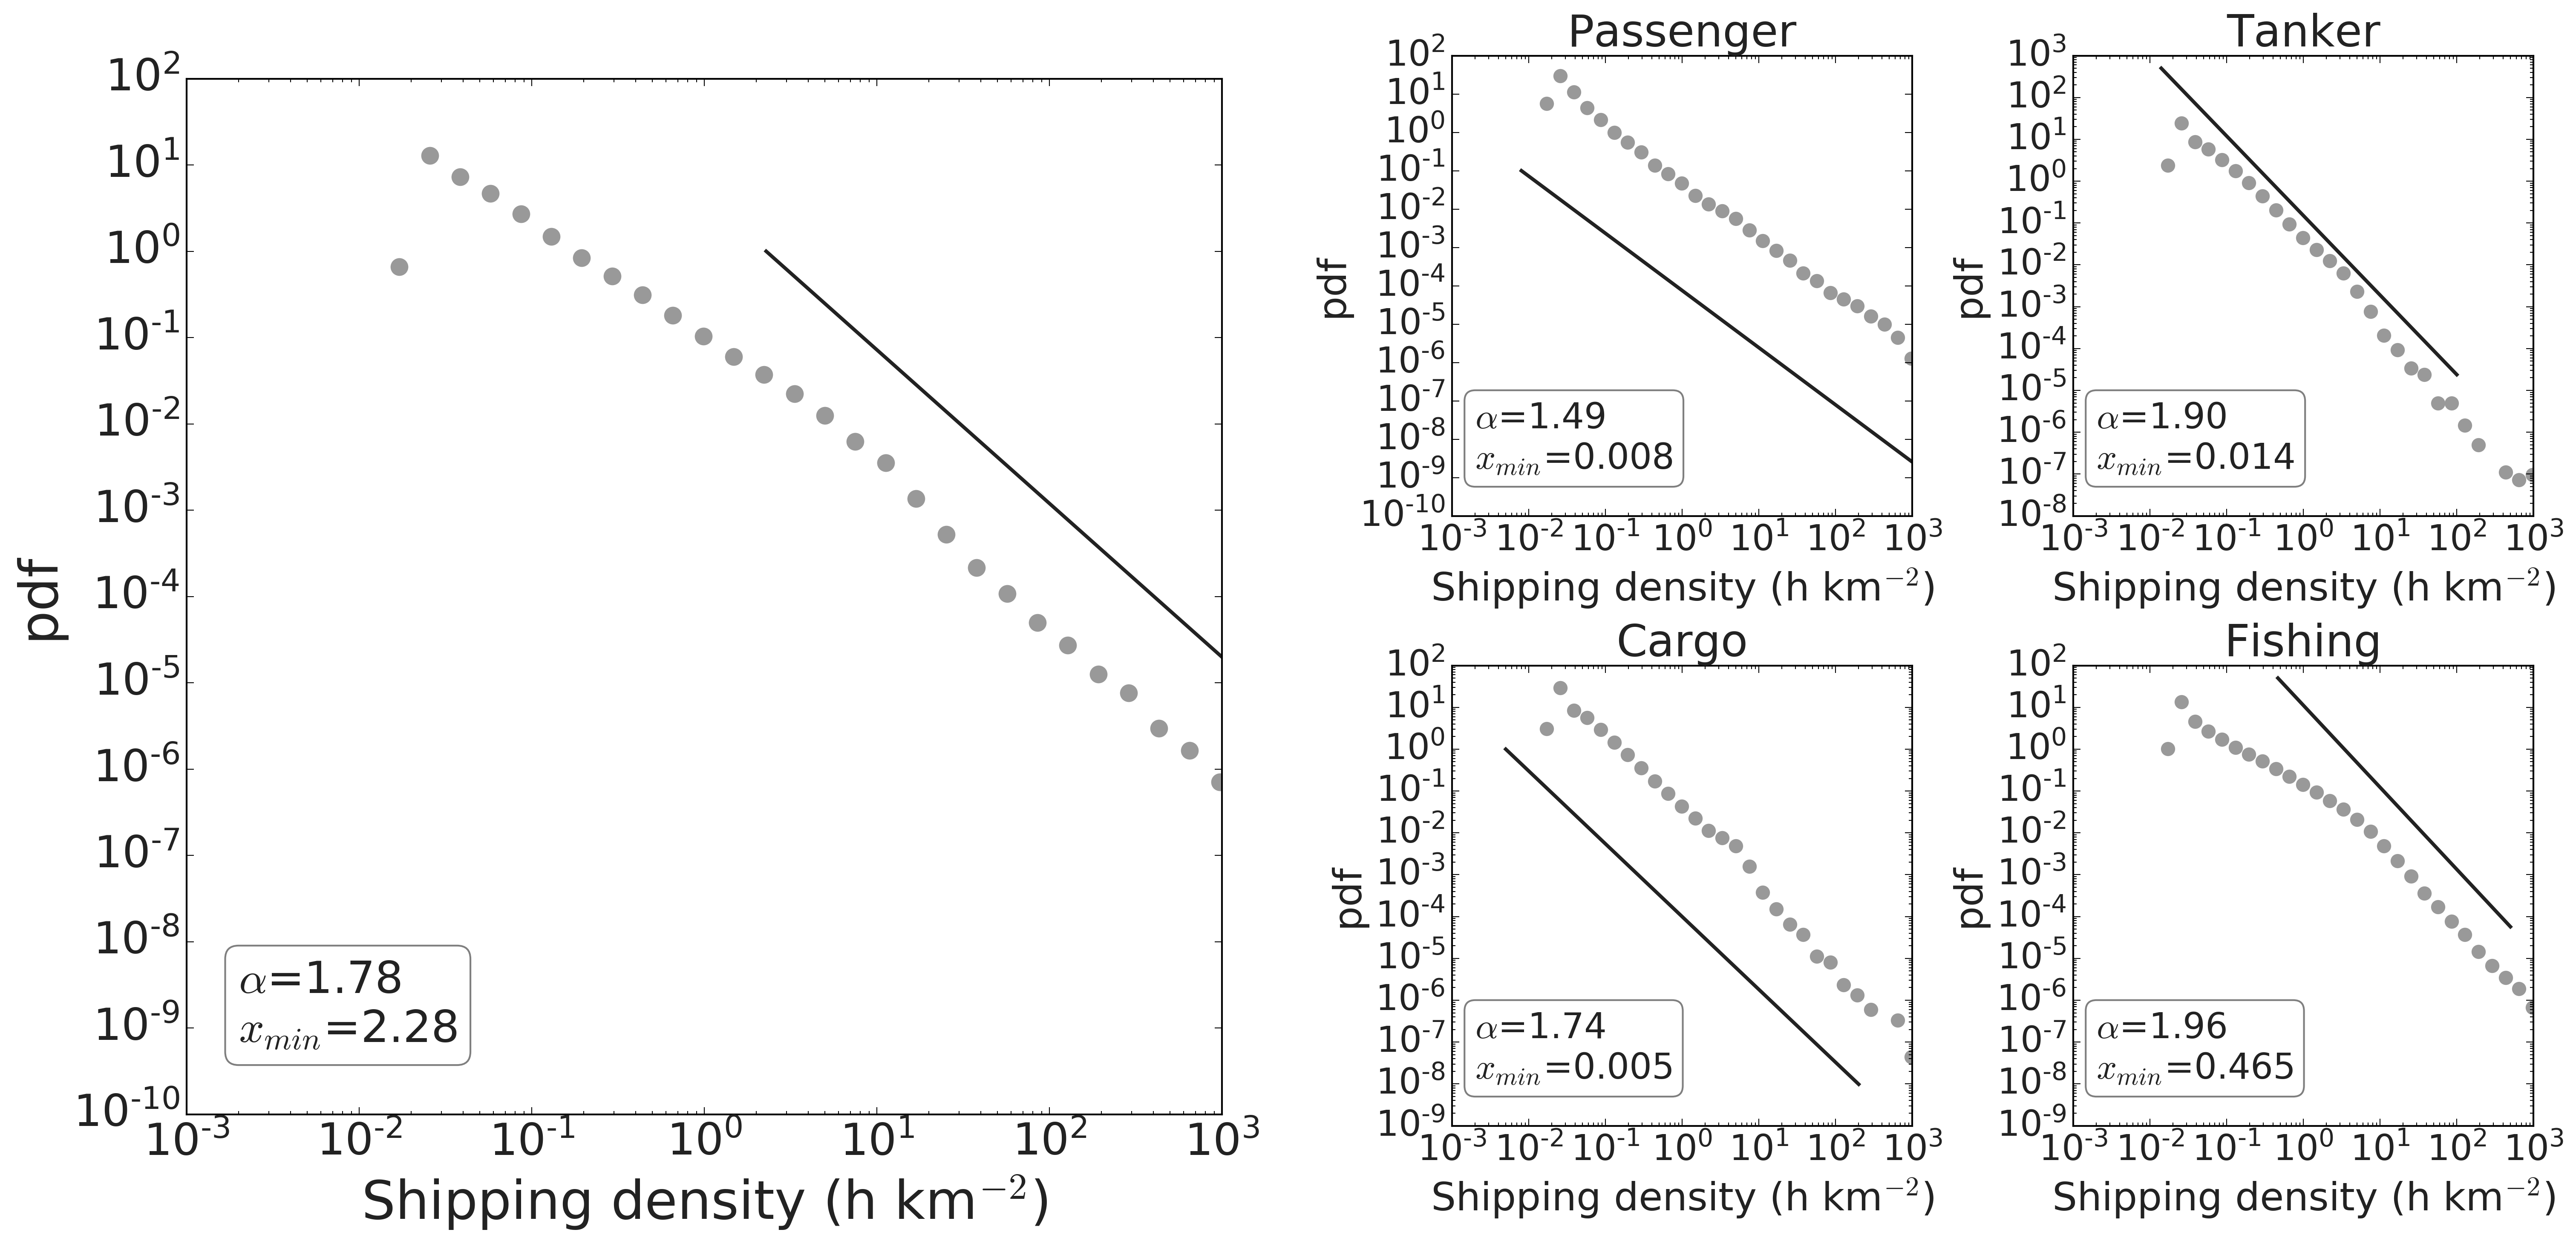

In [8]:
fig = plt.figure(figsize=(9,9),dpi=300)
fig.set_facecolor('w')
ax = plt.gca()
ax.set_position([-0.1,0.08,0.9,0.9])
plt.plot(xs,hists[0],'o',color='#999999',markersize=10,mec='None')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1e3)
plt.ylabel('pdf',size=30,color='#222222')
plt.xticks(size=25,color='#222222')
plt.yticks(size=25,color='#222222')
plt.xlabel(r'Shipping density (h km$^{-2}$)',size=30,color='#222222')
plt.plot([2.28,1e3],[1,1*(1e3/2.28)**-1.78],c='#222222',lw=2)
textstr = r'$\alpha$=1.78'+ '\n'+r'$x_{min}$=2.28'
props = dict(boxstyle='round', facecolor='w', alpha=0.5)
ax.text(0.05, 0.15, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props, color='#222222')

ax1 = fig.add_axes([1,0.07,0.4,0.4])
plt.plot(xs,hists[1],'o',color='#999999',markersize=8,mec='None')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1e3)
plt.ylabel('pdf',size=22,color='#222222')
plt.xlabel(r'Shipping density (h km$^{-2}$)',size=22,color='#222222')
plt.xticks(size=20,color='#222222')
plt.yticks(size=20,color='#222222')
ax1.set_title('Cargo',fontsize=25,color='#222222')
plt.plot([0.005,2e2],[1,1*(2e2/0.005)**-1.74],c='#222222',lw=2)
textstr = r'$\alpha$=1.74'+ '\n'+r'$x_{min}$=0.005'
props = dict(boxstyle='round', facecolor='w', alpha=0.5)
ax1.text(0.05, 0.25, textstr, transform=ax1.transAxes, fontsize=20,
        verticalalignment='top', bbox=props, color='#222222')

ax2 = fig.add_axes([1.54,0.07,0.4,0.4])
plt.plot(xs,hists[2],'o',color='#999999',markersize=8,mec='None')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1e3)
plt.ylabel('pdf',size=22,color='#222222')
plt.xlabel(r'Shipping density (h km$^{-2}$)',size=22,color='#222222')
plt.xticks(size=20,color='#222222')
plt.yticks(size=20,color='#222222')
ax2.set_title('Fishing',fontsize=25,color='#222222')
plt.plot([0.465,5e2],[50,50*(5e2/0.465)**-1.96],c='#222222',lw=2)
textstr = r'$\alpha$=1.96'+ '\n'+r'$x_{min}$=0.465'
props = dict(boxstyle='round', facecolor='w', alpha=0.5)
ax2.text(0.05, 0.25, textstr, transform=ax2.transAxes, fontsize=20,
        verticalalignment='top', bbox=props, color='#222222')

ax3 = fig.add_axes([1,0.6,0.4,0.4])
plt.plot(xs,hists[3],'o',color='#999999',markersize=8,mec='None')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1e3)
plt.ylabel('pdf',size=22,color='#222222')
plt.xlabel(r'Shipping density (h km$^{-2}$)',size=22,color='#222222')
plt.xticks(size=20,color='#222222')
plt.yticks(size=20,color='#222222')
ax3.set_title('Passenger',fontsize=25,color='#222222')
plt.plot([0.008,6e3],[1e-1,1e-1*(6e3/0.008)**-1.49],c='#222222',lw=2)
textstr = r'$\alpha$=1.49'+ '\n'+r'$x_{min}$=0.008'
props = dict(boxstyle='round', facecolor='w', alpha=0.5)
ax3.text(0.05, 0.25, textstr, transform=ax3.transAxes, fontsize=20,
        verticalalignment='top', bbox=props, color='#222222')

ax4 = fig.add_axes([1.54,0.6,0.4,0.4])
plt.plot(xs,hists[4],'o',color='#999999',markersize=8,mec='None')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1e3)
plt.ylabel('pdf',size=22,color='#222222')
plt.xlabel(r'Shipping density (h km$^{-2}$)',size=22,color='#222222')
plt.xticks(size=20,color='#222222')
plt.yticks(size=20,color='#222222')
ax4.set_title('Tanker',fontsize=25,color='#222222')
plt.plot([0.014,1e2],[500,500*(1e2/0.014)**-1.90],c='#222222',lw=2)
textstr = r'$\alpha$=1.90'+ '\n'+r'$x_{min}$=0.014'
props = dict(boxstyle='round', facecolor='w', alpha=0.5)
ax4.text(0.05, 0.25, textstr, transform=ax4.transAxes, fontsize=20,
        verticalalignment='top', bbox=props, color='#222222');


In [9]:
fig.savefig('fig2.png',dpi=300,bbox_inches='tight')
fig.savefig('fig2.pdf',dpi=300,bbox_inches='tight')